# Introduction


**Geospatial Analysis of Crop Yield Variability in Karamoja: Enhancing Food Security Monitoring**

Introduction:

This project addresses the critical issue of food insecurity in Karamoja, Uganda's most vulnerable region. Persistent challenges such as severe droughts and recurrent pest infestations have significantly impacted crop productivity, necessitating innovative approaches to agricultural monitoring and support.

In response to this pressing need, Dalberg Data Insights (DDI) has developed a novel methodology utilizing satellite imagery to remotely assess the yield of sorghum and maize, the primary staple crops in Karamoja. This data science initiative aims to transform raw geospatial data into an interactive visualization tool, serving as a prototype for a comprehensive Food Security Monitoring system.

The primary objective of this analysis is to create a robust, data-driven dashboard that visualizes crop yield variations across Karamoja for the 2017 growing season. This tool will enable stakeholders to:

1. Visualize yield distribution at district and sub-county levels
2. Analyze the correlation between crop productivity and population density
3. Identify high-priority areas for agricultural interventions

By integrating multiple data sources, including shapefiles of administrative boundaries and detailed crop distribution maps, this project seeks to provide actionable insights for NGOs operating in the region. The resulting visualization tool will facilitate evidence-based decision-making, allowing for more targeted and effective allocation of resources to areas of greatest need.

This notebook documents the methodological approach, data preprocessing steps, and visualization techniques employed in developing this prototype. Through rigorous analysis and intuitive data representation, we aim to contribute to the ongoing efforts to enhance food security in Karamoja and demonstrate the potential of geospatial analytics in addressing complex humanitarian challenges.

# Data collection and preparation
Dataset Source Links https://archive.org/download/data_20190829/DATA.zip



# Data exploration and cleaning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the  datasets
yield_subcounty = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
yield_district = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')

# Display basic information about the datasets
print(yield_subcounty.info())
print(yield_district.info())

# Display the first few rows of each dataset
print(yield_subcounty.head())
print(yield_district.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------

In [ ]:
# Check for missing values
yield_subcounty.isnull().sum()
yield_district.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
# Check for duplicate entries
yield_subcounty.duplicated().sum()
yield_district.duplicated().sum()

0

In [ ]:
# Check for inconsistent naming or capitalization in categorical columns
yield_subcounty['SUBCOUNTY_NAME'].value_counts()
yield_district['NAME'].value_counts()

,count
NAME,
ABIM,1
AMUDAT,1
KAABONG,1
KOTIDO,1
MOROTO,1
NAKAPIRIPIRIT,1
NAPAK,1


In [ ]:
# Check if all districts in the subcounty dataset are present in the district dataset
subcounty_districts = yield_subcounty['DISTRICT_NAME'].unique()
district_districts = yield_district['NAME'].unique()
missing_districts = len(subcounty_districts) - len(district_districts)
print("Districts in subcounty data but not in district data:",( missing_districts))

Districts in subcounty data but not in district data: 0


In [ ]:
# Save the cleaned datasets
yield_subcounty.to_csv('cleaned_yield_subcounty.csv', index=False)
yield_district.to_csv('cleaned_yield_district.csv', index=False)


# Data Integration

In this step, we integrate our tabular yield and population data with geographic data from shapefiles. This process allows us to create a comprehensive dataset that combines agricultural statistics with spatial information.

1.Load the cleaned data and the shapefiles:

In [ ]:
import geopandas as gpd
# Load cleaned tabular data
yield_subcounty = pd.read_csv('cleaned_yield_subcounty.csv')
yield_district = pd.read_csv('cleaned_yield_district.csv')

# Load shapefiles
districts_shp = gpd.read_file('/content/Uganda_Districts.shp')
subcounties_shp = gpd.read_file('/content/Uganda_Subcounties.shp')
sorghum_shp = gpd.read_file('/content/Crop_Type_Map_Sorghum.shp')
maize_shp = gpd.read_file('/content/Crop_Type_Map_Maize.shp')

2.Examine the shapefiles to understand their structure:

In [ ]:
print(districts_shp.head())
print(subcounties_shp.head())
print(sorghum_shp.head())
print(maize_shp.head())

   OBJECTID DNAME2014                                           geometry
0         1    MASAKA  POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...
1         2  ALEBTONG  POLYGON ((33.41593 2.14287, 33.41520 2.14219, ...
2         3   BUKEDEA  POLYGON ((34.20871 1.23683, 34.20847 1.23637, ...
3         4     BUSIA  POLYGON ((34.01262 0.24410, 34.01199 0.24363, ...
4         5    MOROTO  POLYGON ((34.90168 2.56680, 34.90168 2.56680, ...
   OBJECTID   SNAME2014                                           geometry
0      1001     KAKOOGE  POLYGON ((32.36852 1.28129, 32.36862 1.28116, ...
1      1002     KALUNGI  POLYGON ((32.65120 1.43626, 32.65483 1.43618, ...
2      1003   LWABIYATA  POLYGON ((32.44624 1.46113, 32.44397 1.45635, ...
3      1004   LWAMPANGA  POLYGON ((32.51158 1.52129, 32.51195 1.52123, ...
4      1005  NABISWEERA  POLYGON ((32.30877 1.25890, 32.30877 1.25890, ...
    DN                                           geometry
0  212  POLYGON ((609120.000 466020.000, 609180.000 46

3.Merge the tabular data with the shapefiles:

In [ ]:
# Merge subcounty data
merged_subcounty = subcounties_shp.merge(yield_subcounty, left_on='SNAME2014', right_on='SUBCOUNTY_NAME', how='left')

# Merge district data
merged_district = districts_shp.merge(yield_district, left_on='DNAME2014', right_on='NAME', how='left')

# Check the results
print(merged_subcounty.head())
print(merged_district.head())

   OBJECTID_x   SNAME2014                                           geometry  \
0        1001     KAKOOGE  POLYGON ((32.36852 1.28129, 32.36862 1.28116, ...   
1        1002     KALUNGI  POLYGON ((32.65120 1.43626, 32.65483 1.43618, ...   
2        1003   LWABIYATA  POLYGON ((32.44624 1.46113, 32.44397 1.45635, ...   
3        1004   LWAMPANGA  POLYGON ((32.51158 1.52129, 32.51195 1.52123, ...   
4        1005  NABISWEERA  POLYGON ((32.30877 1.25890, 32.30877 1.25890, ...   

   OBJECTID_y SUBCOUNTY_NAME DISTRICT_NAME  POP  Area Karamoja  S_Yield_Ha  \
0         NaN            NaN           NaN  NaN   NaN      NaN         NaN   
1         NaN            NaN           NaN  NaN   NaN      NaN         NaN   
2         NaN            NaN           NaN  NaN   NaN      NaN         NaN   
3         NaN            NaN           NaN  NaN   NaN      NaN         NaN   
4         NaN            NaN           NaN  NaN   NaN      NaN         NaN   

   M_Yield_Ha  Crop_Area_Ha  S_Area_Ha  M_Area_Ha 

Handle any missing data resulting from the merge

Check and handle any missing data that may have resulted from the merge

In [ ]:
# Check for missing values
merged_subcounty.isnull().sum()
merged_district.isnull().sum()
# Fill missing values or drop rows as appropriate
merged_subcounty = merged_subcounty.dropna(subset=['S_Yield_Ha', 'M_Yield_Ha'])
merged_district = merged_district.dropna(subset=['S_Yield_Ha', 'M_Yield_Ha'])



4.Create a function to plot the data for visual verification:

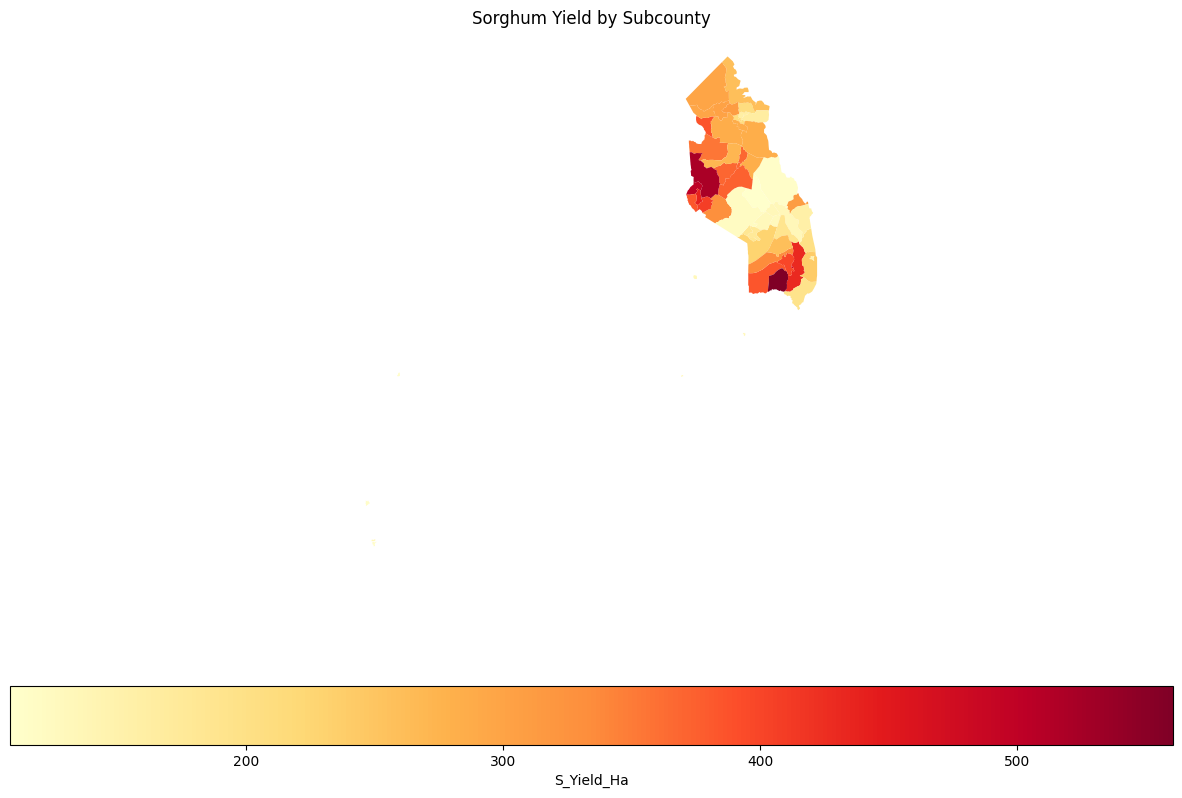

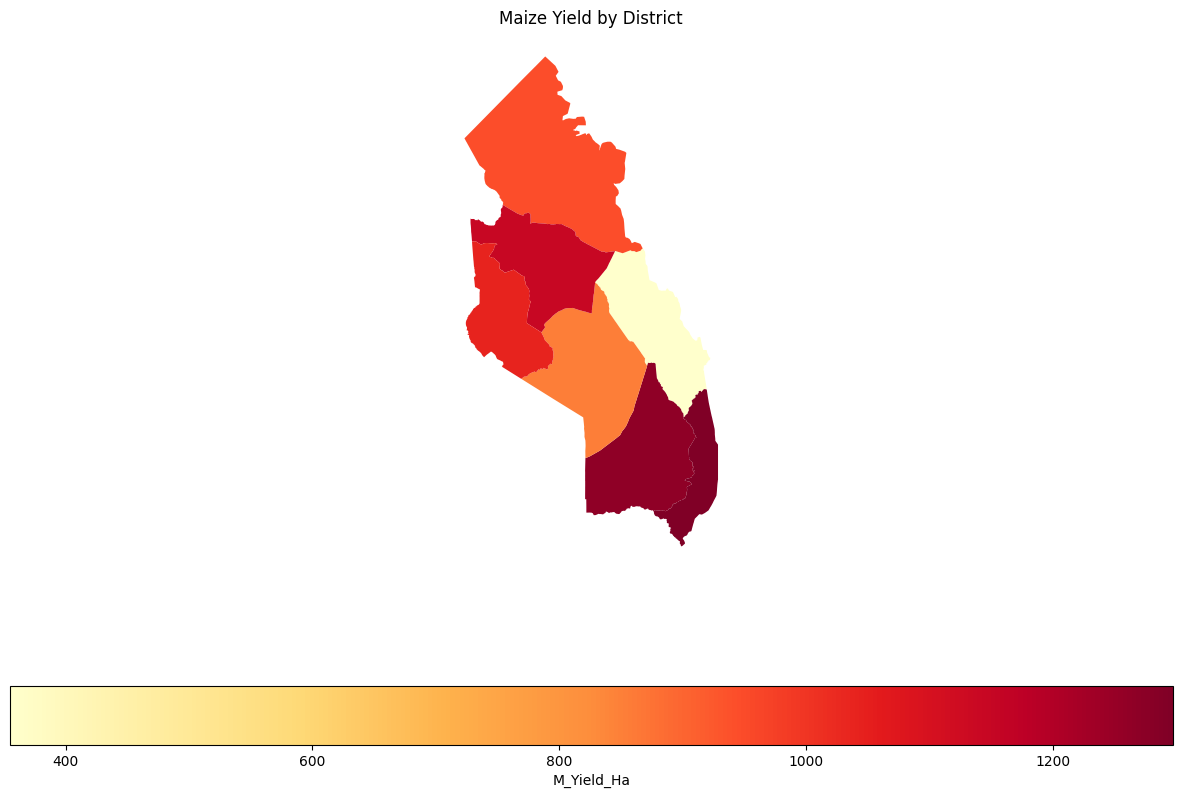

In [ ]:
def plot_choropleth(gdf, column, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.plot(column=column, ax=ax, legend=True, cmap='YlOrRd', legend_kwds={'label': column, 'orientation': "horizontal"})
    ax.set_title(title)
    plt.axis('off')
    plt.show()

# Plot sorghum yield by subcounty
plot_choropleth(merged_subcounty, 'S_Yield_Ha', 'Sorghum Yield by Subcounty')

# Plot maize yield by district
plot_choropleth(merged_district, 'M_Yield_Ha', 'Maize Yield by District')

4.Integrate crop type maps

Verified and standardized Coordinate Reference Systems (CRS)

In [ ]:
print("Subcounties CRS:", subcounties_shp.crs)
print("Sorghum CRS:", sorghum_shp.crs)
print("Maize CRS:", maize_shp.crs)

Subcounties CRS: EPSG:32636
Sorghum CRS: EPSG:32636
Maize CRS: EPSG:32636


Reprojecting all shapefiles to EPSG:32636 (UTM zone 36N) for accurate area calculations

In [ ]:
# abcounties_shp = subcounties_shp.to_crs('EPSG:32636')
sorghum_shp = sorghum_shp.to_crs('EPSG:32636')
maize_shp = maize_shp.to_crs('EPSG:32636')

Now we can perform the overlay operations:

In [ ]:
sorghum_area = gpd.overlay(subcounties_shp, sorghum_shp, how='intersection')
maize_area = gpd.overlay(subcounties_shp, maize_shp, how='intersection')

Calculate the areas (now in square meters):

In [ ]:
sorghum_area['sorghum_area'] = sorghum_area.geometry.area
maize_area['maize_area'] = maize_area.geometry.area

# Convert to hectares if desired
sorghum_area['sorghum_area_ha'] = sorghum_area['sorghum_area'] / 10000
maize_area['maize_area_ha'] = maize_area['maize_area'] / 10000

Aggregate areas by subcounty:



In [ ]:
sorghum_area_by_subcounty = sorghum_area.groupby('SNAME2014')['sorghum_area_ha'].sum().reset_index()
maize_area_by_subcounty = maize_area.groupby('SNAME2014')['maize_area_ha'].sum().reset_index()

Merge area data with the main dataset:

In [ ]:
merged_subcounty = merged_subcounty.merge(sorghum_area_by_subcounty, left_on='SNAME2014', right_on='SNAME2014', how='left')
merged_subcounty = merged_subcounty.merge(maize_area_by_subcounty, left_on='SNAME2014', right_on='SNAME2014', how='left')

Save the final integrated datasets:

In [ ]:
# Function to truncate column names as merging is not possible because of column length
def truncate_column_names(gdf, max_length=10):
    gdf.columns = [col[:max_length] for col in gdf.columns]
    return gdf

merged_subcounty = truncate_column_names(merged_subcounty)
merged_district = truncate_column_names(merged_district)

In [ ]:
# Function to scale down large numbers
def scale_large_numbers(gdf, columns_to_scale, scale_factor=1e-6):
    for col in columns_to_scale:
        if col in gdf.columns:
            gdf[col] = gdf[col] * scale_factor
    return gdf

# Identify columns with large numbers
large_number_columns = ['Area', 'POP', 'Crop_Area_', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot']

merged_subcounty = scale_large_numbers(merged_subcounty, large_number_columns)
merged_district = scale_large_numbers(merged_district, large_number_columns)

Save the final integrated datasets:

In [ ]:
#Check and drop any duplicate columns in the dataset
print(merged_subcounty.columns.duplicated())
print(merged_district.columns.duplicated())


[False False False False False False False False False False False False
 False False False False]
[False False False False False False False False False False False False
 False False]


In [ ]:
merged_subcounty.drop(columns=merged_subcounty.columns[merged_subcounty.columns.duplicated()], inplace=True)

In [ ]:
# Save as shapefiles for use in Tableau
merged_subcounty.to_file('integrated_subcounty_data.shp')
merged_district.to_file('integrated_district_data.shp')

# Also save as CSV for easier handling if needed
merged_subcounty.to_csv('integrated_subcounty_data.csv', index=False)
merged_district.to_csv('integrated_district_data.csv', index=False)

#the saved dataset will be transferred to Tableau for the visualizations

**Conclusion and Recommendations**

**Conclusion**

The Food Security Monitoring Tool developed for the Karamoja region of Uganda provides valuable insights into the agricultural productivity and food security situation. By visualizing yield data for sorghum and maize across different administrative levels, this tool offers a comprehensive overview of the region's crop production.
Key findings include:

Spatial variation in crop yields across districts and sub-counties

Correlation between crop yields and population density

Identification of areas with particularly low yields, indicating potential food insecurity hotspots



Correlation between crop yields and population density

Identification of areas with particularly low yields, indicating potential food insecurity hotspots



**Recommendations**

Based on the analysis and visualization of the crop yield data, we recommend the following actions:


Focus immediate support on sub-counties with the lowest crop yields, particularly those with high population densities.
Develop targeted strategies for areas showing significant discrepancies between sorghum and maize yields.


Integrate predictive modeling to forecast potential yield outcomes based on current conditions.
Develop functionality to compare data across multiple years to identify long-term trends.


Expand geographical coverage:

Consider expanding the tool to cover other food-insecure regions in Uganda or neighboring countries.